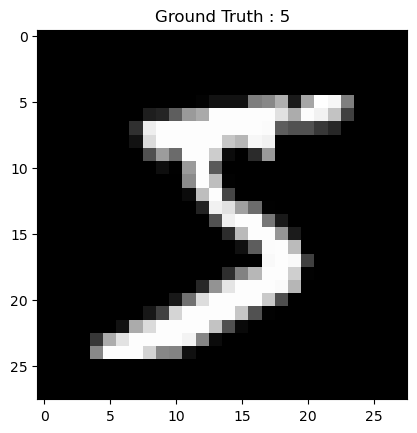

(60000, 784)
1.0
(60000, 10)


In [23]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#reshape to 1D array
train_images = train_images.reshape(60000,784)
test_images = test_images.reshape(10000,784)

#display the first image in the training data
import matplotlib.pyplot as plt
plt.imshow(train_images[0].reshape(28,28),cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()

print(train_images.shape)
#divide by 255 to normalize
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255
print(np.max(train_images[0]))
#one hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

print(train_labels.shape)



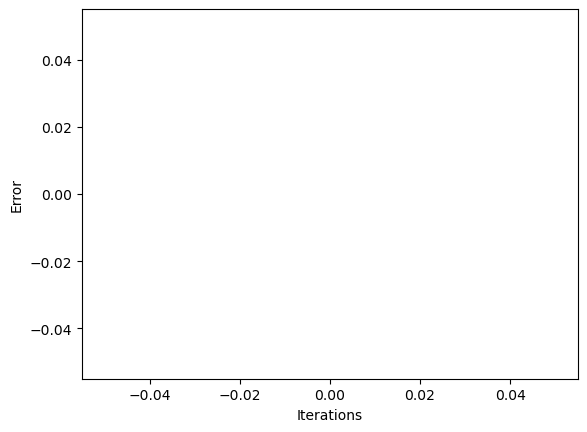

0.1047


In [24]:
model = [Dense(784, 128),
         Tanh(),
         Dense(128, 10),
         Tanh()]

batch_size = 60
epochs = 1
learning_rate = 0.01
n_batches = 60000/batch_size
error = []
for epoch in range(0):
    for index in range(60000):
        input = train_images[index].reshape(784,1)
        for layer in model:
            input = layer.forward(input)
        prediction = input
        
        output_gradient = mse_prime(train_labels[index].reshape(10,1), prediction)
        
        for layer in reversed(model):
            output_gradient = layer.backward(output_gradient)

        if index % batch_size == 0:
            for layer in model:
                layer.update(learning_rate,batch_size)
            error.append(mse(train_labels[index].reshape(10,1), prediction))

#graph error
import matplotlib.pyplot as plt
plt.plot(error)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

#test model
correct = 0
for index in range(10000):
    input = test_images[index].reshape(784,1)
    for layer in model:
        input = layer.forward(input)
    prediction = input
    if np.argmax(prediction) == np.argmax(test_labels[index]):
        correct += 1
print(correct/10000)


    

In [26]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils

def preprocess_data(x, y, limit):
    # reshape and normalize input data
    x = x.reshape(x.shape[0], 28 * 28, 1)
    x = x.astype("float32") / 255
    # encode output which is a number in range [0,9] into a vector of size 10
    # e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    y = np_utils.to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)
    return x[:limit], y[:limit]


# load MNIST from server
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 1000)
x_test, y_test = preprocess_data(x_test, y_test, 200)

# neural network
network = [
    Dense(28 * 28, 40, regularization=0.01),
    Tanh(),
    Dense(40, 10, regularization=0.01),
    Tanh()
]

# train
costs = train(network, mse, mse_prime, x_train, y_train, epochs=500, batch_size = 1, learning_rate=0.01)

# plot costs
import matplotlib.pyplot as plt
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# calculate error on test set
error = 0
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    error += mse(y, output)
error /= len(x_test)
print("error:", error)


# test
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    print('pred:', np.argmax(output), '\ttrue:', np.argmax(y))


1/500, error=0.9431316570979038
2/500, error=0.8659185463274556
3/500, error=0.7700768687771512
4/500, error=0.6625622418410099
5/500, error=0.5298448789857981
6/500, error=0.3648622364719243
7/500, error=0.2051844021611651
8/500, error=0.11431705495560683
9/500, error=0.07882936606665529
10/500, error=0.06636892832977517
11/500, error=0.06145304409836527
12/500, error=0.05890113196399993
13/500, error=0.05715387371205231
14/500, error=0.055843406768639754
15/500, error=0.054916661341383725
16/500, error=0.05431251329146983
17/500, error=0.053929408933156585
18/500, error=0.05367414531454936
19/500, error=0.05349612638672242
20/500, error=0.0533698125465286
21/500, error=0.053278132363853904
22/500, error=0.0532083136568142
23/500, error=0.053151593052002205
24/500, error=0.05310268409956311
25/500, error=0.05305870798104484
26/500, error=0.05301816598710991
27/500, error=0.05298024544909334
28/500, error=0.052944443765445715
29/500, error=0.05291039782228452
30/500, error=0.0528778202

KeyboardInterrupt: 

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



X = np.reshape([[0, 0], [0, 1], [1, 0], [1, 1]], (4, 2, 1))
Y = np.reshape([[0], [1], [1], [0]], (4, 1, 1))

network = [
    Dense(2, 100),
    Tanh(),
    Dense(100,100),
    Tanh(),
    Dense(100,10),
    Tanh(),
    Dense(10, 1),
    Tanh()
]

# train
train(network, mse, mse_prime, X, Y, epochs=500000, batch_size = 1, learning_rate=0.01)

# decision boundary plot
points = []
for x in np.linspace(0, 1, 20):
    for y in np.linspace(0, 1, 20):
        z = predict(network, [[x], [y]])
        points.append([x, y, z[0,0]])

points = np.array(points)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], cmap="winter")
plt.show()

    

1/500000, error=0.8940171677087639
2/500000, error=0.6663369521045654
3/500000, error=0.47299397754441064
4/500000, error=0.2507205939860258
5/500000, error=0.2544669247305927
6/500000, error=0.25681956415012885
7/500000, error=0.26577382381515696
8/500000, error=0.2590633514755895
9/500000, error=0.25465799187186466
10/500000, error=0.2520261669617332
11/500000, error=0.25067039426884985
12/500000, error=0.250133182020497
13/500000, error=0.24999571518581476
14/500000, error=0.24997763909698195
15/500000, error=0.24997764821091795
16/500000, error=0.24997834041044675
17/500000, error=0.2499786133578414
18/500000, error=0.24997869539237677
19/500000, error=0.24997871257820176
20/500000, error=0.2499787088630971
21/500000, error=0.24997869775878262
22/500000, error=0.2499786825478854
23/500000, error=0.24997866307700137
24/500000, error=0.24997863801484602
25/500000, error=0.24997860563401664
26/500000, error=0.24997856410993033
27/500000, error=0.24997851165777843
28/500000, error=0.24

KeyboardInterrupt: 